## Import processed data

In [1]:
import numpy as np

rsd = np.genfromtxt('rsd_array++.csv', delimiter=',')

assert len(rsd) == 13336

## Show data distribution

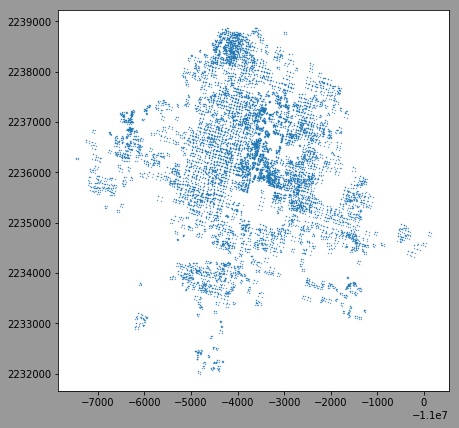

In [4]:
# rsd_show = rsd[::10]

import matplotlib.pyplot as plt

plt.figure(figsize=(7,7), facecolor='.6')
plt.scatter(rsd[:, 0], rsd[:, 1], s = 0.1) # s =[i/10000 for i in range(13336)]
plt.show()

# Decide an Appropriate K-Value

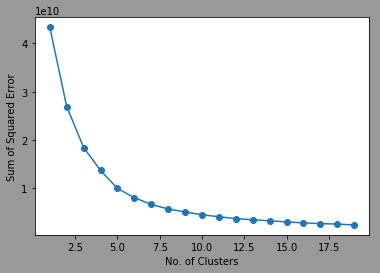

In [5]:
# To see what's a reasonable K-value
# SSE (Sum of Squared Errors) value vs. K value
# A proper k value locates a the turning point of the graph

from sklearn.cluster import KMeans
distortions = []
for i in range(1,20):
    km = KMeans(n_clusters=i,init="k-means++",n_init=10,
                max_iter=3000,tol=1e-7,random_state=None)
    # n_init-初始样本中心个数；max_iter:设置最大迭代次数；tol:设置算法的容错范围SSE(簇内误平方差);init:random表示使用Kmeans算法，默认是k-means++

    km.fit(rsd)
    # get Sum of Squared Errors
    distortions.append(km.inertia_)

# show
plt.figure(facecolor='.6')
plt.plot(range(1,20),distortions,marker="o")
plt.xlabel("No. of Clusters")
plt.ylabel("Sum of Squared Error")
plt.show()




### Acordingly, 10 would be a fair k-value.

# Run K-Means & Draw the Graph

In [6]:
rsd_clustered = KMeans(n_clusters=10, random_state=None).fit_predict(rsd)
# each item in rsd_clustered is the group number of one coordinate in rsd

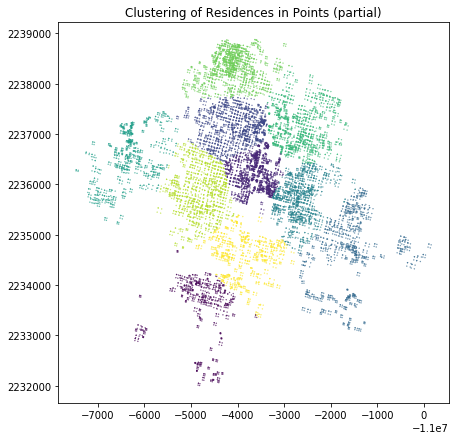

In [10]:
plt.figure(figsize=(7,7), facecolor='1')

plt.scatter(rsd[:, 0], rsd[:, 1], c = rsd_clustered, s = 0.1)  # c = sequence of color


plt.title("Clustering of Residences in Points (partial)")
plt.show()